# EXPLORATORY DATA ANALYSIS

## Loading & First exploration

This section is a preliminatory datasets exploration, in order to have a first idea of the four datasets, to look for any missing values and outliers.

### Preliminary loading 

In [309]:
#Loading necessary packages
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [204]:
#Loading the datasets
df_prices = pd.read_csv("quote_prices.csv", sep = ",")
df_postcode = pd.read_csv("postcode_sector_data.csv", sep = ",")
df_authority = pd.read_csv("local_authority_data.csv", sep = ",")

In [205]:
df_prices.head()

,postcode,premium_price
0,B975BQ,324.58
1,UB33PN,3245.06
2,RH149XP,197.84
3,W130AG,1253.53
4,M145DT,514.05


In [206]:
# Find the postcode sector for each postcode
df_prices['postcode_sector'] = df_prices['postcode'].apply(lambda x :x[:-2])

In [207]:
# Compute the mean premium price per postcode
df_premium = df_prices.groupby('postcode_sector').mean()  

We observe that we have premium price information only for 9186 postcode sectors, instead of the 11049 total postcode sectors

### Combining all datasets

In [208]:
#Let's combine our postcode dataset with the local authority and premium prices dataset (the key is the postcode sector)
df = pd.merge(df_postcode, df_authority ,on='postcode_sector',how='left')
df = pd.merge(df, df_premium ,on='postcode_sector',how='left')
df.head()

,postcode_sector,relative_area,population_density,multiple_deprivation_index,income_deprivation_index,employment_deprivation_index,crime_deprivation_index,rural_urban,distance_to_station,never_worked,region,road_usage,total_offences,vehicle_offences,premium_price
0,AB101,1354.03,53.819802,16.748,0.105,0.091,-0.028,Large urban area,0.829961,Average,Scotland,NaN,NaN,NaN,1089.114048
1,AB106,458.99,86.465844,16.748,0.105,0.091,-0.028,Large urban area,1.609040,Average,Scotland,NaN,NaN,NaN,681.312556
2,AB107,1053.10,55.795067,16.748,0.105,0.091,-0.028,Large urban area,2.899283,Average,Scotland,NaN,NaN,NaN,629.203778
3,AB115,2317.54,60.742963,16.748,0.105,0.091,-0.028,Large urban area,0.773404,Average,Scotland,NaN,NaN,NaN,1935.176471
4,AB116,918.22,95.784434,16.748,0.105,0.091,-0.028,Large urban area,0.533438,Average,Scotland,NaN,NaN,NaN,718.888242


In [209]:
df.describe()

,relative_area,population_density,multiple_deprivation_index,income_deprivation_index,employment_deprivation_index,crime_deprivation_index,distance_to_station,total_offences,vehicle_offences,premium_price
count,1.104900e+04,11049.000000,11049.000000,11049.000000,11049.000000,11049.000000,10802.000000,7290.000000,7290.000000,9137.000000
mean,2.944941e+04,39.764310,21.207778,0.135428,0.112575,0.014776,3.645512,24074.484636,2062.055007,917.064403
std,7.680114e+04,47.004446,12.736262,0.082094,0.064393,0.611716,7.639011,22507.081726,2201.091528,397.080218
min,4.900000e-01,0.000000,1.359000,0.010344,0.008469,-2.363734,0.010192,59.000000,5.000000,121.157500
25%,1.033500e+03,15.618391,13.592035,0.086492,0.075344,-0.355000,0.789229,8738.000000,605.000000,646.392667
50%,3.262260e+03,32.557088,16.748000,0.105000,0.091000,-0.028000,1.641826,17288.500000,1178.000000,849.347765
75%,2.165445e+04,50.476471,25.974194,0.166279,0.133281,0.373901,3.731692,29012.000000,3077.000000,1114.800548
max,3.074884e+06,3267.993529,84.098545,0.580217,0.497000,2.821130,231.957307,114675.000000,12776.000000,8694.675000


In [210]:
df.dtypes

postcode_sector                  object
relative_area                   float64
population_density              float64
multiple_deprivation_index      float64
income_deprivation_index        float64
employment_deprivation_index    float64
crime_deprivation_index         float64
rural_urban                      object
distance_to_station             float64
never_worked                     object
region                           object
road_usage                       object
total_offences                  float64
vehicle_offences                float64
premium_price                   float64
dtype: object

In [211]:
#Convert road_usage type variable into float64
df['road_usage'] = df['road_usage'].replace({'..': None})
df['road_usage'] = df['road_usage'].astype(float)

We observe that there are some anomalies in the variable never_worked that we will deal with in the section outliers

## Target analysis

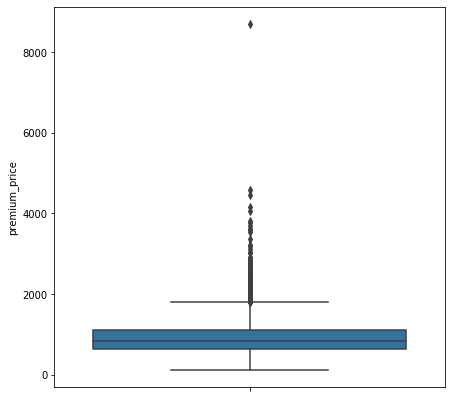

In [212]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(7, 7)
ax = sns.boxplot(y="premium_price" , data=df)

We can observe that there are outliers that flatten the box-plot of the target variable. We will deal with them in the next session.

## Data Cleaning

### Missing values cleaning

In [213]:
df.isnull().sum()

postcode_sector                    0
relative_area                      0
population_density                 0
multiple_deprivation_index         0
income_deprivation_index           0
employment_deprivation_index       0
crime_deprivation_index            0
rural_urban                        0
distance_to_station              247
never_worked                       0
region                             0
road_usage                      6061
total_offences                  3759
vehicle_offences                3759
premium_price                   1912
dtype: int64

We observe a few missing values. 
- We choose to drop the missing values associated with premium price (the variable to predict), not to put too much bias into our model. We won't replace missing values for the target
- We will also delete the 247 missing values for distance_to_station as it reprensents around 2% rows of the datasets
- For the other 3 variables with missing values (road_usage, total_offences and vehicle_offenses), we choose to replace all the missing value by the mean value according the region, in order to best approximate the missing values. A next step would be to take the mean according the the urban_rural AND region variables

In [214]:
df = df.dropna(subset = ['premium_price', 'distance_to_station'])

In [215]:
df["vehicle_offences"] = df['vehicle_offences'].fillna(df.groupby('region')['vehicle_offences'].transform('mean'))
df["total_offences"] = df['total_offences'].fillna(df.groupby('region')['total_offences'].transform('mean'))
df["road_usage"] = df['road_usage'].fillna(df['road_usage'].mean())

### Deal with the outliers of premium prices

In [216]:
df['premium_price'].describe()

count    8906.000000
mean      916.895659
std       398.098331
min       121.157500
25%       645.526211
50%       849.194253
75%      1115.162555
max      8694.675000
Name: premium_price, dtype: float64

In [217]:
# For the outliers, we will use Z-score strategy 
#to identify Data point that falls outside of 3 standard deviations 
#z_score = np.abs(stats.zscore(df.premium_price))
threshold = 3
outliers = df[(z_score > 3)]

With this method, we only have 84 outliers (less than 1% of the dataset), so we will delete them

In [218]:
# Delete the outliers
df = df.drop(outliers.index)

In order to see if there are absurd values in qualitative data, we did a quick value count on each qualitative variable. We observe that there are 16 absurd values for the variable never_worked. Indeed, in the datasets description, it is said that we should have "high" or "average" modalities.

In [219]:
df['never_worked'].value_counts()

Average               7959
High                   847
['Average' 'High']      16
Name: never_worked, dtype: int64

We choose to delete the "['Average' 'High']" modality

In [220]:
df['never_worked'] = df['never_worked'][df['never_worked'] != "['Average' 'High']"]

## Variables correlation analysis

### Quantative variables correlation

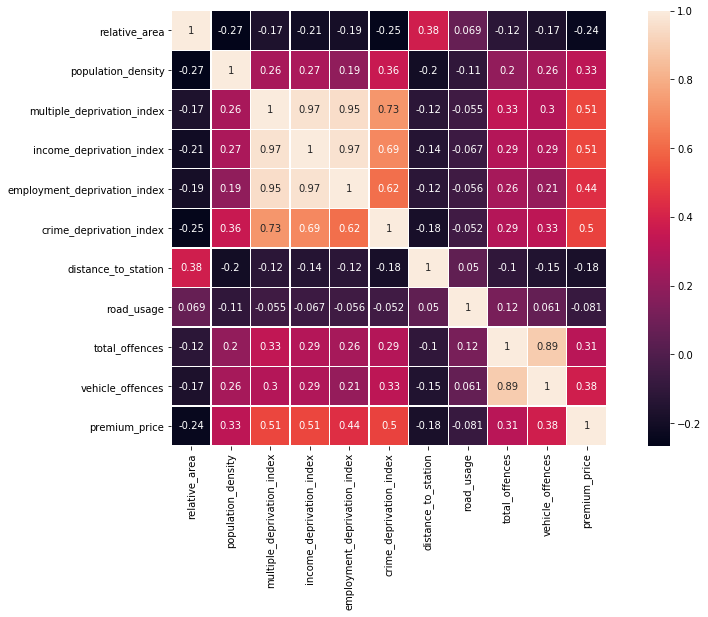

In [221]:
#Display the correlation matrix between the variables 
base_correlation = df._get_numeric_data()
corrMatrix = base_correlation.corr()
plt.figure(figsize = (15,8))
sns.heatmap(corrMatrix, annot=True, square=True, linewidths=.3)

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

There seems to be strong correlation betweeen some numerical variable and our variable to predict (premium), as for example the crime_deprivation_index, the employment_deprivation_index and vehicle offenses, with correlation coefficients > 0.3 or < -0.3. However, there is a problem a multicollinearity between the predictors, that we should cope with. Indeed, some variables are correlated with each other, so we should not all include them in our model to avoid redundancy. For example multiple_deprivation_index, employment_deprivation_index and multiple_deprivation_index are strongly positevely correlated between each others.

### Correlation between the mean premium price and the qualitative variables

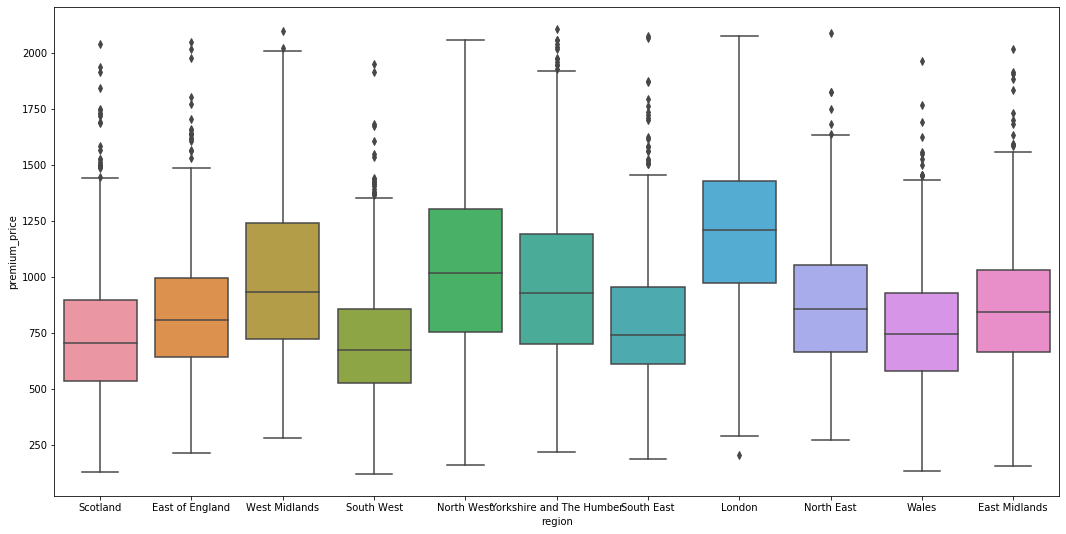

In [222]:
# Display the distribution of premium price according to the region
fig, ax = plt.subplots()
fig.set_size_inches(18, 9)
ax = sns.boxplot(x="region", y="premium_price" , data=df)

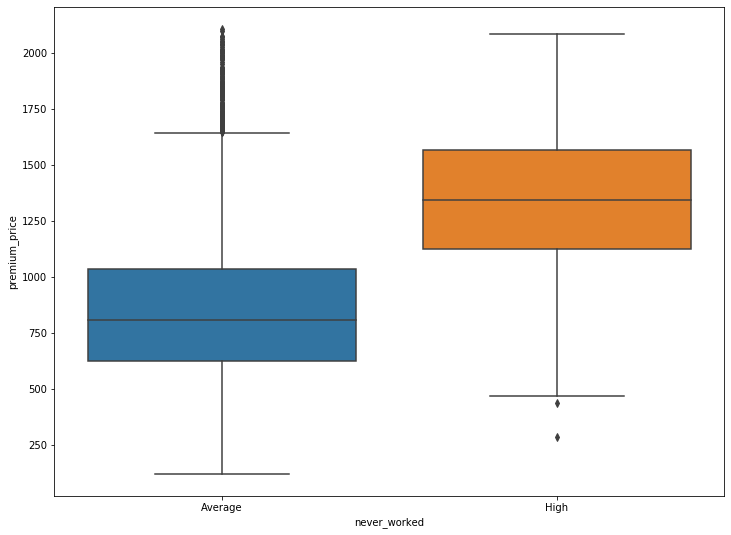

In [223]:
# Display the distribution of premium price according to the proportion of residents that have never worked
fig, ax = plt.subplots()
fig.set_size_inches(12, 9)
ax = sns.boxplot(x="never_worked", y="premium_price" , data=df)

# MODELLING

## Defining metrics

As a criteria of evaluation, we choose the RMSE score to evaluate our error, because we are facing a regression problem and we want to penalize large errors more.

In [224]:
# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(y_actual, y_predict):
    rmse = sqrt(mean_squared_error(y_actual, y_predict))
    return rmse

## Features Engineering

In [227]:
#Converting categorical data
df = df.join(pd.get_dummies(df['region'], prefix='r'))
df = df.join(pd.get_dummies(df['never_worked'], prefix='nw'))

#Delete useless columns - We won't include rural_urban feature in our model for a matter of time
df = df.drop(['region', 'never_worked', 'rural_urban'], axis = 1)

## Split into X & Y

In [229]:
X = df.drop(['postcode_sector', 'premium_price'], axis=1)
y = df['premium_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Features importance & selection

### Random Forest Feature Importance

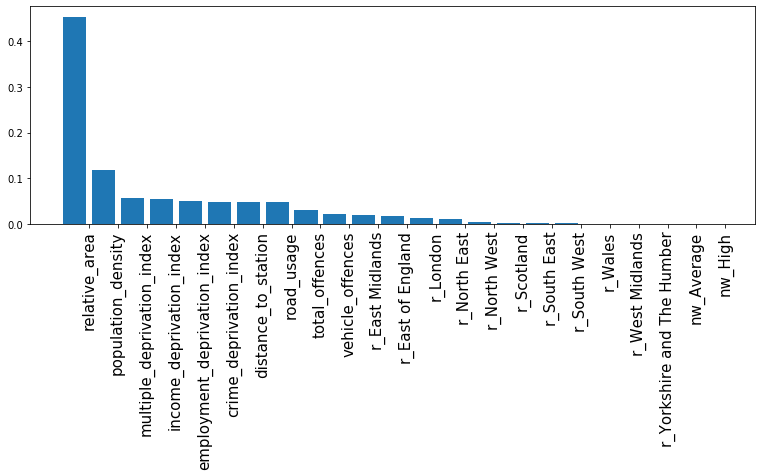

In [234]:
# define the model
model_rf = RandomForestRegressor(
         n_estimators=10, max_depth=10)

# fit the model
model_rf.fit(X_train, y_train)

# Get importance
ordering = np.argsort(model_rf.feature_importances_)[::-1][:50]

importances = model_rf.feature_importances_[ordering]

x = np.arange(len(features))
fig = plt.figure(figsize=(13,4))
plt.bar(x, importances)
plt.xticks(x + 0.5, features, rotation=90, fontsize=15);

## Model testing

### Random Forest training

In [305]:
# Regressor choice with basic parameters
model_rf = RandomForestRegressor(
         n_estimators=50, max_depth=8, max_features = 15)

model_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
                      max_features=15, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [306]:
#predictions
predict_rf = model_rf.predict(X_test)
print(rmse(y_test, predict_rf))

263.61192548867086


# NEXT STEPS

Next steps to go further:
    - We could have kept the feature rural_urban and cluster it into several classes
    - For the linear regression, we should have normalized the data
    - To improve our RMSE we could have fine-tuned the parameters of our model with Gridsearch 
    - We could have taken other metrics (R2 for accuracy) to evaluate our model